In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, HTML

base_folder = ".."

## Topologies

In [98]:
def read_topology(topology_name):
    print(f"Topology name: {topology_name}")
    print(f"Path: {base_folder}/resources/env/{topology_name}.txt")
    df = pd.read_csv(f"{base_folder}/resources/env/{topology_name}.txt", delimiter=";")
    display(HTML(df.to_html()))

read_topology("multi")
read_topology("single")

Topology name: multi
Path: ../resources/env/multi.txt


,ClusterID,ClusterName,Cores,Speed,Memory,numberOfHosts,memoryCapacityPerHost,coreCountPerHost
0,A01,A01,32,3.20,2048,1,256,32
1,B01,B01,48,2.93,1256,6,64,8
2,C01,C01,32,3.20,2048,2,128,16


Topology name: single
Path: ../resources/env/single.txt


,ClusterID,ClusterName,Cores,Speed,Memory,numberOfHosts,memoryCapacityPerHost,coreCountPerHost
0,A01,A01,28,3.2,128,1,128,8


## Traces

In [99]:
# A trace is a measurement of a datacenter, over an amount of time (e.g., we saw an activity over some time). The trace is a more detailed summary of the metatrace

df_trace = pd.read_parquet(f"{base_folder}/resources/bitbrains-small/trace/trace.parquet")
# df_trace.head()
df_trace[df_trace["timestamp"] == "2013-08-12 13:50:46+00:00"]

,id,timestamp,duration,cpu_count,cpu_usage
6148,1023,2013-08-12 13:50:46+00:00,900000,1,0.000000
11255,1026,2013-08-12 13:50:46+00:00,300000,1,31.210664
24017,1129,2013-08-12 13:50:46+00:00,300000,1,0.000000
34041,1138,2013-08-12 13:50:46+00:00,300000,1,27.733326
53662,116,2013-08-12 13:50:46+00:00,600000,4,154.102636
66382,190,2013-08-12 13:50:46+00:00,300000,8,13993.196276
73302,205,2013-08-12 13:50:46+00:00,300000,8,12989.598097
87700,244,2013-08-12 13:50:46+00:00,300000,8,98.799961
95286,272,2013-08-12 13:50:46+00:00,300000,8,162.933290
102709,281,2013-08-12 13:50:46+00:00,300000,8,76.266645


In [100]:
# In the metatrace, it is a summary of the tasks / jobs.

df_meta = pd.read_parquet(f"{base_folder}/resources/bitbrains-small/trace/meta.parquet")
df_meta.head()

,id,start_time,stop_time,cpu_count,cpu_capacity,mem_capacity
0,1019,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2926.000135,181352
1,1023,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2925.999560,260096
2,1026,2013-08-12 13:35:46+00:00,2013-09-11 13:39:58+00:00,1,2925.999717,249972
3,1052,2013-08-29 14:38:12+00:00,2013-09-05 07:09:07+00:00,1,2926.000107,131245
4,1073,2013-08-21 11:07:12+00:00,2013-09-11 13:39:58+00:00,1,2599.999649,179306


# Lets run this in OpenDC!

## Resulting Files

In [101]:
output_folder = f"{base_folder}/output"
print(f"Output folder: {output_folder}")
workload = "workload=bitbrains-small"
seed = "seed=0"

# we focus on host, for the metamodel, fragile state
df_host_single = pd.read_parquet(f"{output_folder}/host/topology=single/{workload}/{seed}/data.parquet")
df_host_multi = pd.read_parquet(f"{output_folder}/host/topology=multi/{workload}/{seed}/data.parquet")
# we focus on host, for the metamodel, fragile state


# temporarily, out of focus
df_server_single = pd.read_parquet(f"{output_folder}/server/topology=single/{workload}/{seed}/data.parquet")
df_server_multi = pd.read_parquet(f"{output_folder}/server/topology=multi/{workload}/{seed}/data.parquet")

df_service_single = pd.read_parquet(f"{output_folder}/service/topology=single/{workload}/{seed}/data.parquet")
df_service_multi = pd.read_parquet(f"{output_folder}/service/topology=multi/{workload}/{seed}/data.parquet")
# temporarily, out of focus

Output folder: ../output


In [102]:
def add_absolute_timestamp(df, start_dt):
    df["absolute_timestamp"] = start_dt + (df["timestamp"] - df["timestamp"].min())

add_absolute_timestamp(df_host_single, df_meta["start_time"].min())
add_absolute_timestamp(df_host_single, df_meta["start_time"].min())


# temporarily, out of focus
add_absolute_timestamp(df_server_single, df_meta["start_time"].min())
add_absolute_timestamp(df_server_multi, df_meta["start_time"].min())

add_absolute_timestamp(df_service_single, df_meta["start_time"].min())
add_absolute_timestamp(df_service_multi, df_meta["start_time"].min())
# temporarily, out of focus

In [103]:
len(df_service_single)

25922

In [104]:
df_service_single.head()

,timestamp,hosts_up,hosts_down,servers_pending,servers_active,attempts_success,attempts_failure,attempts_error,absolute_timestamp
0,1970-01-01 00:05:00+00:00,1,0,29,15,15,0,0,2013-08-12 13:35:46+00:00
1,1970-01-01 00:10:00+00:00,1,0,29,15,15,0,0,2013-08-12 13:40:46+00:00
2,1970-01-01 00:15:00+00:00,1,0,29,15,15,0,0,2013-08-12 13:45:46+00:00
3,1970-01-01 00:20:00+00:00,1,0,29,15,15,0,0,2013-08-12 13:50:46+00:00
4,1970-01-01 00:25:00+00:00,1,0,29,15,15,0,0,2013-08-12 13:55:46+00:00


In [105]:
df_server_single.head()

,timestamp,server_id,server_name,host_id,mem_capacity,cpu_count,cpu_limit,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,uptime,downtime,provision_time,boot_time,absolute_timestamp
0,1970-01-01 00:05:00+00:00,00000000-0000-0000-06c4-5d188009454f,1019,e220a839-7b1d-cdaf-0000-000000000000,181,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
1,1970-01-01 00:05:00+00:00,00000000-0000-0000-1b39-896a51a8749b,1023,e220a839-7b1d-cdaf-0000-000000000000,260,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
2,1970-01-01 00:05:00+00:00,00000000-0000-0000-2c82-9abe1f4532e1,1026,e220a839-7b1d-cdaf-0000-000000000000,250,1,25600.0,2,2622,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
3,1970-01-01 00:05:00+00:00,00000000-0000-0000-3ee5-789041c98ac3,1129,e220a839-7b1d-cdaf-0000-000000000000,125,1,25600.0,0,2624,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00
4,1970-01-01 00:05:00+00:00,00000000-0000-0000-657e-ecdd3cb13d09,1138,e220a839-7b1d-cdaf-0000-000000000000,157,1,25600.0,2,2951,0,0,300000,0,1970-01-01 00:00:00+00:00,1970-01-01 00:00:00+00:00,2013-08-12 13:35:46+00:00


<Axes: >

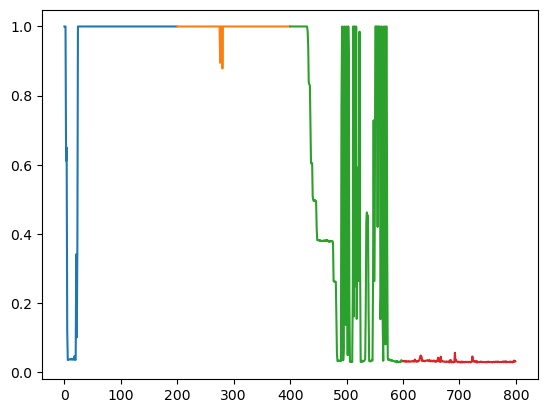

In [106]:
df_host_single.cpu_utilization
# array of 50 numbers
# arrayNumbers = np.square(np.arange(50))
# plt.plot(arrayNumbers)
# show the graph with matplotlib
df_host_single.cpu_utilization[:200].plot()
df_host_single.cpu_utilization[200:400].plot()
df_host_single.cpu_utilization[400:600].plot()
df_host_single.cpu_utilization[600:800].plot()

In [107]:
df_host_multi.head()

,timestamp,host_id,cpu_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,cpu_limit,cpu_usage,cpu_demand,cpu_utilization,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_total,uptime,downtime,boot_time
0,1970-01-01 00:05:00+00:00,f88bb8a8-724c-81ec-0000-000000000002,8,64000,0,5,0,0,23440.0,10988.033203,10988.033203,0.468773,1125,1274,0,0,81094.853325,300000,0,1970-01-01 00:00:00+00:00
1,1970-01-01 00:05:00+00:00,1b39896a-51a8-749b-0000-000000000003,8,64000,0,5,0,0,23440.0,641.603821,641.603821,0.027372,65,2334,0,0,61231.893844,300000,0,1970-01-01 00:00:00+00:00
2,1970-01-01 00:05:00+00:00,c584133a-c916-ab3c-0000-000000000000,16,128000,0,5,0,0,51200.0,10547.469727,10547.469727,0.206005,988,3811,0,0,69270.356164,300000,0,1970-01-01 00:00:00+00:00
3,1970-01-01 00:05:00+00:00,53cb9f0c-747e-a2ea-0000-000000000004,8,64000,0,5,0,0,23440.0,351.659912,351.659912,0.015003,36,2363,0,0,60675.262769,300000,0,1970-01-01 00:00:00+00:00
4,1970-01-01 00:05:00+00:00,e220a839-7b1d-cdaf-0000-000000000000,32,256000,0,5,0,0,102400.0,2214.168945,2214.168945,0.021623,207,9392,0,0,60973.170219,300000,0,1970-01-01 00:00:00+00:00


In [108]:
set(d1) == set(d2)

NameError: name 'd1' is not defined

## Power Usage

In [ ]:
print(f"single topology:  {df_host_single.power_total.sum()}")
print(f"multi topology:   {df_host_multi.power_total.sum()}")

## CPU usage

In [ ]:
print(f"single topology:  {df_host_single.cpu_usage.mean()}")
print(f"multi topology:   {df_host_multi.cpu_usage.mean()}")

## CPU utilization

In [ ]:
print(f"single topology:  {df_host_single.cpu_utilization.mean()}")
print(f"multi topology:   {df_host_multi.cpu_utilization.mean()}")

## Plotting Results

In [ ]:
data = df_host_multi.cpu_utilization
plt.hist(data, weights=np.ones_like(data) / len(data),
         alpha=0.7, label="multi", bins=30)


data = df_host_single.cpu_utilization
plt.hist(data, weights=np.ones_like(data) / len(data),
         alpha=0.7, label="single", bins=30)

plt.xlabel("CPU utilization")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_service_single.servers_pending, label="servers pending")
plt.plot(df_service_single.servers_active, label="servers active")

plt.legend()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_service_multi.servers_pending, label="servers pending")
plt.plot(df_service_multi.servers_active, label="servers active")

plt.legend()

In [ ]:
df_server_single.head()

In [ ]:
utilization = df_host_single.cpu_utilization.to_numpy()

In [ ]:
window = 2000
avg_utilization = []

for ind in range(len(utilization) - window + 1):
    avg_utilization.append(np.mean(utilization[ind:ind+window]))

plt.plot(avg_utilization)

In [ ]:
sum_util = []

last_util = 0
for util in utilization:
    sum_util.append(util + last_util)
    last_util = sum_util[-1]

plt.plot(sum_util)

In [ ]:
output_file = "../Python_scripts/meta_small.parquet"
output_file_path = Path(output_file)

df_meta_new.to_parquet(output_file_path, index=False)

output_file = "../Python_scripts/trace_small.parquet"
output_file_path = Path(output_file)
df_trace_new.to_parquet(output_file_path, index=False)
